Lance Uy - 1006123570

# Homework #3 -- *you'll need to do this on google colab*

0. Find data set on [kaggle](https://www.kaggle.com).
1. Provide posterior inference for a column of data with a `PyMC` ***normal-gamma specification***.
2. Find a different column of data for which a ***normal-gamma specification*** isn't justified.
3. Create a different `PyMC` specification that IS appropriate for this new data column:
    - here are your `PyMC` choices for [continuous distributions](https://www.pymc.io/projects/docs/en/stable/api/distributions/continuous.html)
    - here are your `PyMC` choices for [discrete distributions](https://www.pymc.io/projects/docs/en/stable/api/distributions/discrete.html)

### ...just make sure you've chosen a reasonable likelihood for your non-normal data and that the support of your priors makes sense for the values the parameters of your likelihood can take on...

4. Provide posterior inference for the parameters of your new specification given the column of non-normal data
using `PyMC` and provide an analysis of the MCMC chains.

# 0. Find data set on kaggle.

The dataset is about diamonds

In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az

url = 'https://raw.githubusercontent.com/LanceUy/STA365/main/Diamonds%20Prices2022.csv'

data = pd.read_csv(url)

# 1. Provide posterior inference for a column of data with a PyMC normal-gamma specification.

(55.0, 70.0)

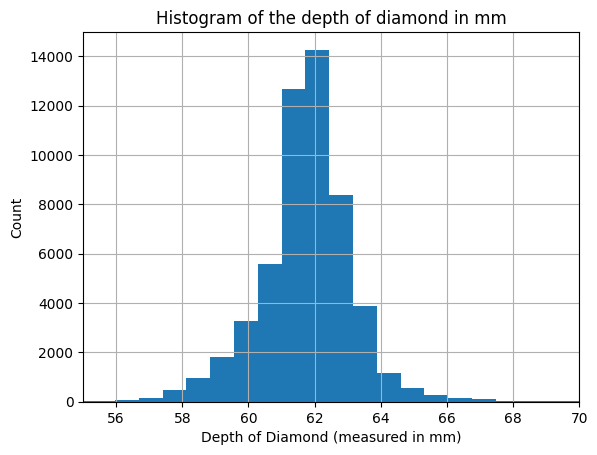

In [33]:
data.hist(column = "depth", bins = 50)
plt.title('Histogram of the Depth of Diamonds')
plt.xlabel('Depth of Diamond (measured in mm)')
plt.ylabel('Count')
plt.xlim(55, 70)

In [35]:
# PYMC: Probabilistic Programming
theta_0,tau = 0,1; alpha,beta = 2,1/2
depth = data["depth"]

import pymc as pm
normal_gamma_depth_model = pm.Model()
with normal_gamma_depth_model:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=depth)

# Posterior sampling
with normal_gamma_depth_model:
    idata_HMC = pm.sample()

HMC Split-Rhats {'theta': 1.0006, 'phi': 1.0008} | 

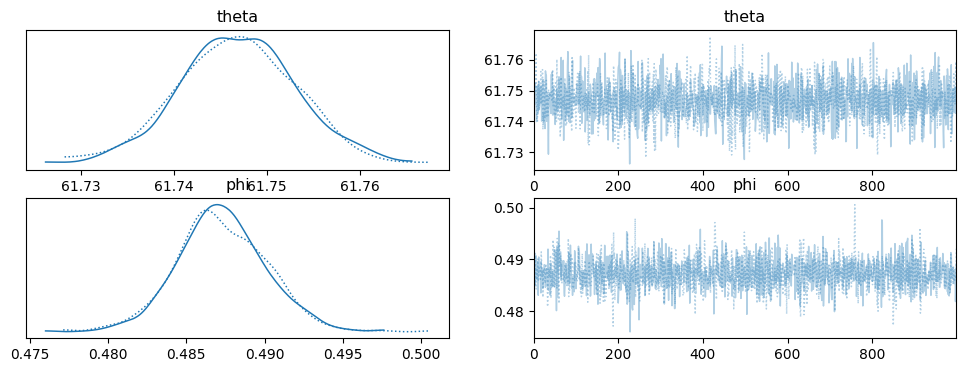

In [47]:
# Convergence Checks
az.plot_trace(idata_HMC)
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | ');

In [37]:
# Effective Sample Size
print("number of MCMC samples:", idata_HMC.posterior['phi'].values.flatten().shape[-1])
az.summary(idata_HMC, round_to=2)

number of MCMC samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,61.75,0.01,61.74,61.76,0.0,0.0,2139.11,1350.91,1.0
phi,0.49,0.00,0.48,0.49,0.0,0.0,2170.28,1426.47,1.0


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

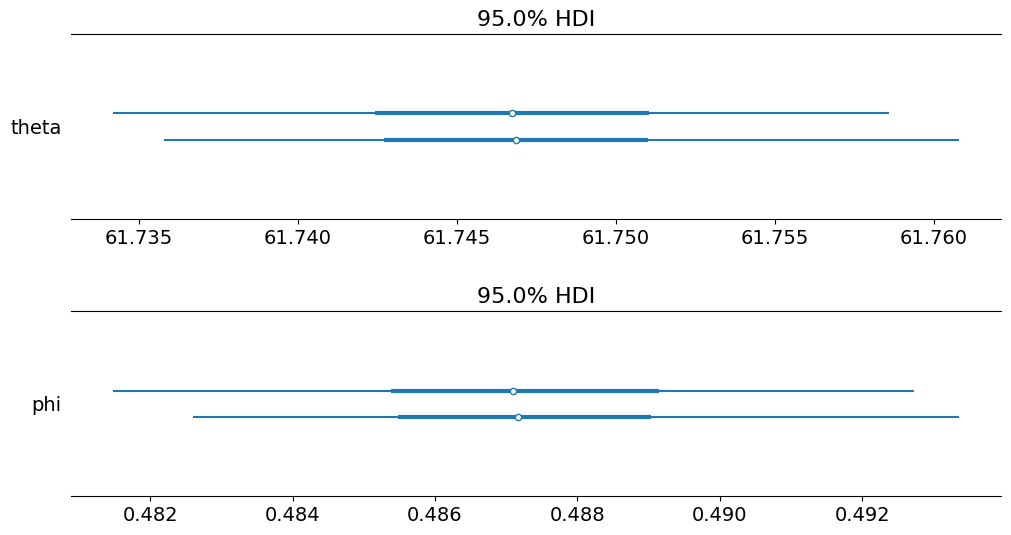

In [38]:
fig,ax = plt.subplots(2,1,figsize =(12,6))
plt.subplots_adjust(hspace=0.5)
az.plot_forest(idata_HMC, var_names=["theta"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(idata_HMC, var_names=["phi"], combined=False, hdi_prob=0.95, ax=ax[1])

# 2. Find a different column of data for which a normal-gamma specification isn't justified.

Text(0, 0.5, 'Count')

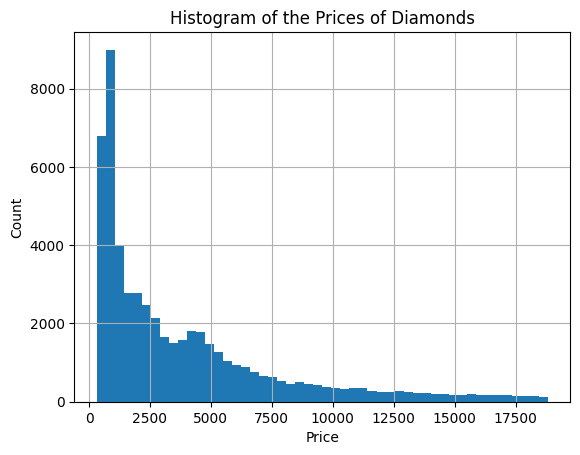

In [42]:
data.hist(column = "price", bins = 50)
plt.title('Histogram of the Prices of Diamonds')
plt.xlabel('Price')
plt.ylabel('Count')


As shown the data is not normally-distributed and is continuous

# 3. Create a different PyMC specification that IS appropriate for this new data column:

In [63]:
# PYMC: Probabilistic Programming
price = data["price"]

nonnormal_price_model = pm.Model()
with nonnormal_price_model:
    alpha = pm.Exponential("alpha", 1)
    beta = pm.Exponential("beta", 1)
    x_obs = pm.Gamma("likelihood", alpha=alpha, beta=beta, observed=price)

# Posterior sampling
with nonnormal_price_model:
    nonnormal_data_HMC = pm.sample()

# 4. Provide posterior inference for the parameters of your new specification given the column of non-normal data using `PyMC` and provide an analysis of the MCMC chains.

HMC Split-Rhats {'alpha': 1.0011, 'beta': 1.0006} | 

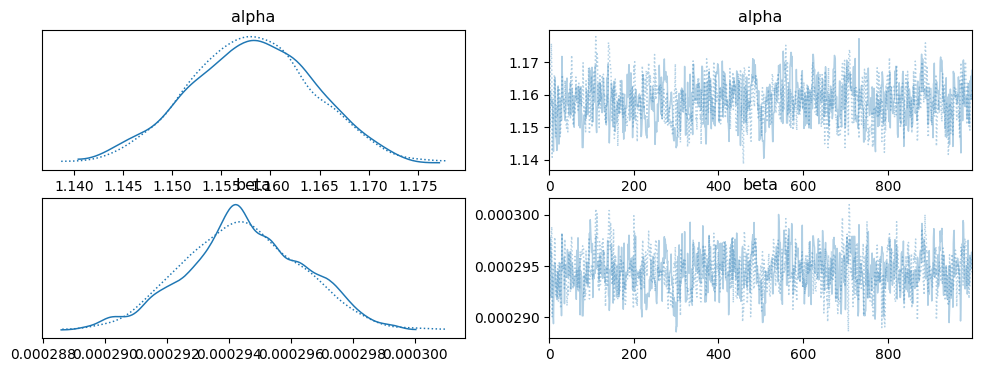

In [64]:
az.plot_trace(nonnormal_data_HMC)
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(nonnormal_data_HMC).items()}, end=' | ')

The Rhat values close to 1 for 'alpha' and 'beta' (1.0011 and 1.0006, respectively) indicate strong convergence in the Markov Chain Monte Carlo (MCMC) simulation, suggesting reliable estimates of the posterior distribution.

In [67]:
print("number of MCMC samples:", nonnormal_data_HMC.posterior['alpha'].values.flatten().shape[-1])
print("number of MCMC samples:", nonnormal_data_HMC.posterior['beta'].values.flatten().shape[-1])
az.summary(nonnormal_data_HMC, round_to=2)

number of MCMC samples: 2000
number of MCMC samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.16,0.01,1.15,1.17,0.0,0.0,511.01,812.61,1.0
beta,0.00,0.00,0.00,0.00,0.0,0.0,528.71,876.51,1.0


Both 'alpha' and 'beta' have effective sample sizes (ess_bulk) around 500, which is generally considered reasonable. The r_hat values are close to 1, indicating good convergence. These results suggest that the MCMC sampling process has produced a sufficient number of effectively independent samples for both parameters.

array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

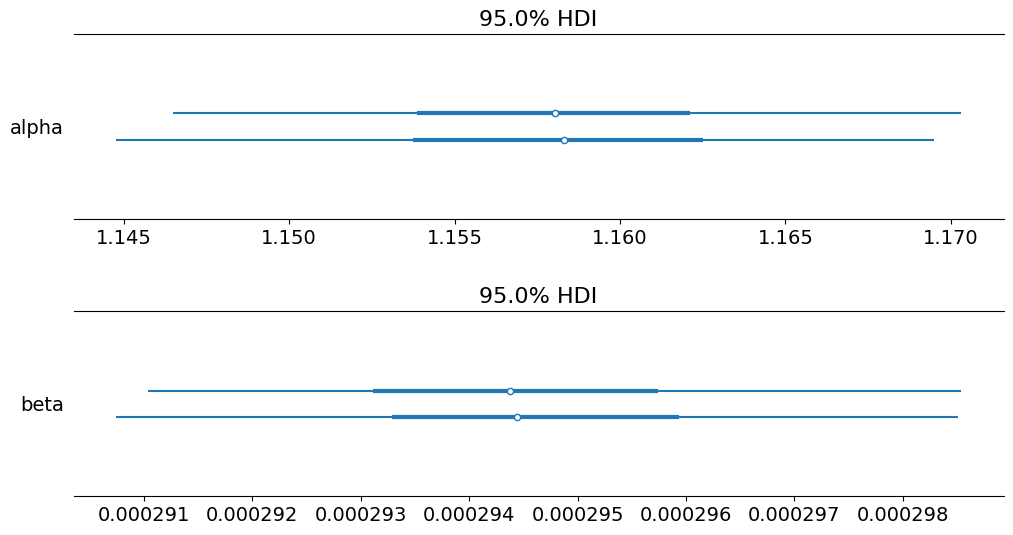

In [66]:
fig,ax = plt.subplots(2,1,figsize =(12,6))
plt.subplots_adjust(hspace=0.5)
az.plot_forest(nonnormal_data_HMC, var_names=["alpha"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(nonnormal_data_HMC, var_names=["beta"], combined=False, hdi_prob=0.95, ax=ax[1])